In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Create two histograms in a subplot that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data
How do you choose your bin size? 


In [2]:
belize_airbnb_df = pd.read_csv("belize_airbnb_listings.csv")
belize_airbnb_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.0,5,225


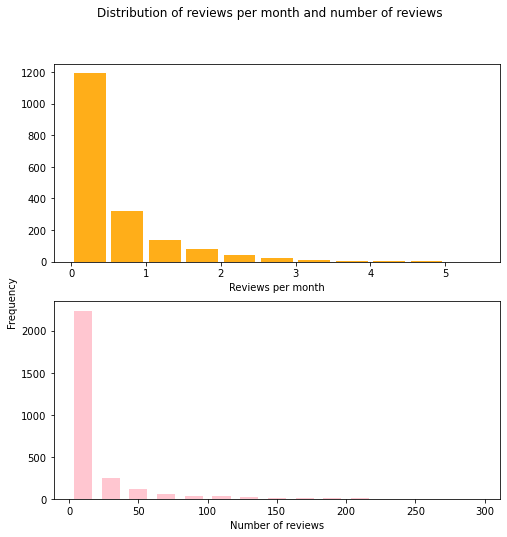

In [393]:
fig,ax =  plt.subplots(2)
fig.set_size_inches([8,8])

plt.suptitle("Distribution of reviews per month and number of reviews")
plt.ylabel("Frequency",position=(2,1))

##Looking at the data of reviews_per_months, there are highest number of reviews_per_month for 0.08. Hence to include 
# that range bin size is taken as below
#print(belize_airbnb_df['reviews_per_month'].value_counts().head(10))
bins = np.arange(0,6,0.5)
ax[0].hist(x="reviews_per_month",data=belize_airbnb_df,bins=bins,color='orange',alpha=0.9,rwidth=0.85)
ax[0].set_xlabel("Reviews per month")

##Looking at the data for number_of_reviews its spread is from 0 to 350 the most between 0 and 150 and hence including below binsize to show the spread
#print(belize_airbnb_df['number_of_reviews'].value_counts().head(10))
bins = np.arange(0,320,20)
ax[1].hist(x="number_of_reviews",data=belize_airbnb_df,bins=bins,color='pink',alpha=0.9,rwidth=0.65)
ax[1].set_xlabel("Number of reviews")
plt.show()





## 2. Create a box and whisker plot for availability_365. What does this show you?

Text(0.5, 0, 'Availability 365 ')

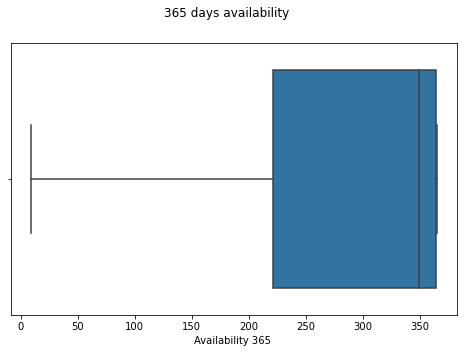

In [385]:
plt.figure(figsize=(8,5))
sns.boxplot(x="availability_365",data=belize_airbnb_df,showfliers=False)
plt.suptitle("365 days availability")
plt.xlabel("Availability 365 ")
# Median availability is 350 days
# Spread of availability is from min 1 day to max 365 days and shows the quartiles Q1- 25%,Q2-50% i.e median and Q3-75%

## 3. What is the probablity that the price for an Airbnb is under 50
#### Probability of price of an Airbnb under 50 is 1.75%
* a. what to you notice about these records? Hint : look at the other columns
     - Belize Mainland neighbourhood has minimum price i.e 20
     - Orange walk neighbourhood has lowest listing count for price under 50
     - Cayo neighbourhood has more probability of finding a listing under 50, it has high no of listing count.
     
* b. What distributions does this data most closely fit?
    - Bimodal distribution. The two peaks in a bimodal distribution also represent two maximums one at 28 and other at 40; these are points where the data points stop increasing and start decreasing.



In [399]:
## find probablity of airbnb under 50
price_under50 = belize_airbnb_df[belize_airbnb_df['price']<50]
## divide no.of under rows of under 50 df with total no. of rows from belize airbnb df
prob = (100 *price_under50.shape[0])/belize_airbnb_df.shape[0]
print("Probablity of price under $50:",prob)

#a. what to you notice about these records?
price_under50.groupby('neighbourhood').agg({'price':'mean','calculated_host_listings_count':'count'})

Probablity of price under $50: 1.7525035765379113


,price,calculated_host_listings_count
neighbourhood,,
Belize Islands,39.000000,4
Belize Mainland,35.066667,15
Cayo,35.047619,21
Orange Walk,22.000000,1
Stann Creek Mainland,28.000000,6
Toledo Mainland,35.000000,2


C:\Ananonda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


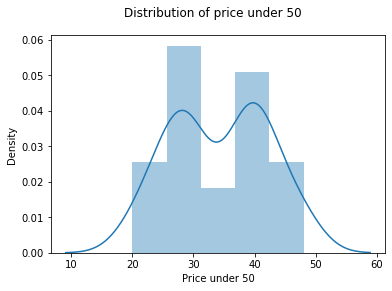

In [384]:
#b. What distributions does this data most closely fit?
#Plot probability distribution for price under 50
sns.distplot(price_under50['price'])
plt.suptitle("Distribution of price under 50")
plt.xlabel('Price under 50')
plt.show()

## 4. Calculate the sample variance and standard deviation for all the numerical columns in the same output.
* a. Why the sample variance and not population variance?
    - This data is not the entire population from belize airbnb. Its the subset of population. It is not always possible to get the whole population data. Inferences can be made from sample population to predict about entire population.
    - pd.DataFrame.std degree of freedom is 1 by default also known as sample standard deviation
    - numpy.std assumes 0 as degree of freedom also known as population standard deviation
* b. What is your takeaway for each metric?
    - count  - There are 2796 records in belize airbnb dataframe loaded from csv file
    - mean   - average price in the belize airbnb listing is 357.10
    - std    - sample standard deviation 563.12
    - min    - minimum price in belize airbnb listing is 20
    - 25%    - minimum_nights is 1
    - 50%    - median price is 220
    - 75%    - minimum_nights between 1 and 3
    - max    - maximum price in belize airbnb listing is 11788
    
    - Most people book atleast for minimum 3 night ;
    - 75% listing are available for more than 360 days
    - people who book more than 3 nights tend to write reviews more often
* c. What are the scales of measurement for each of these values? - Quantitative data
    - Price                     - Ratio    - Range from min of 20 to max of 11788.
    - minimum_nights            - Ratio
    - number_of_reviews         - Ratio    - Range from min of 0 to 316
    - reviews_per_month         - Ratio    - Range from 0 to 6 , 
    - calculated_host_listings  - Ratio
    - availability_365          - Ratio
    - Id                        - Ordinal
    - host_id                   - Ordinal
    - longitude                 - Interval
    - lattitude                 - Interval

In [402]:
#4. Calculate the sample variance and standard deviation for all the numerical columns in the same output
display(belize_airbnb_df.describe())

#4 a.
#np.std ddof is 0 by default - population standard deviation
print(np.std(belize_airbnb_df["number_of_reviews"]))

#pandas std with ddof=0 - population standard deviation
print(belize_airbnb_df["number_of_reviews"].std(ddof=0))

#Pandas ddof is 1 by default - sample standard deviation, please see describe() outout


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.796000e+03,2.796000e+03,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,1810.000000,2796.000000,2796.000000
mean,2.792490e+07,1.240278e+08,17.448295,-88.292035,357.102289,2.263948,14.453505,0.538088,22.848355,280.315451
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
min,3.666600e+04,1.507890e+05,16.079260,-89.150680,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.870854e+07,4.389292e+07,17.129573,-88.371015,135.000000,1.000000,0.000000,0.110000,2.000000,221.000000
50%,2.891586e+07,9.171577e+07,17.735145,-88.205560,220.000000,2.000000,2.000000,0.275000,6.000000,349.000000
75%,3.977962e+07,1.875677e+08,17.913837,-87.973793,394.250000,3.000000,13.000000,0.700000,14.000000,364.000000
max,4.833222e+07,3.890334e+08,18.468140,-87.593140,11788.000000,180.000000,316.000000,5.920000,204.000000,365.000000


30.32234403539402
30.32234403539402


## 5. What percent of Airbnb listings in Belize are available 360 days a year or more? 
#### 39.52% probability that Airbnb listings in Belize are available 360 days a year or more

* a. 360 days or less
    - 61.55%
* b. What distribution does this data most closely fit? 
    - left skewed distribution for available 360 days a year or more
    - Multimodal distribution(i.e more than one peak) for available 360 days a year or less

0.3952074391988555


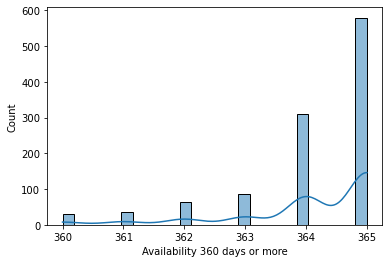

In [373]:
#5.Probablity of listing available 360 days or more a year
avail360_df = belize_airbnb_df.loc[belize_airbnb_df["availability_365"]>=360]
prob_avail360 = avail360_df.shape[0]/belize_airbnb_df.shape[0]
print(prob_avail360)

# distribution
sns.histplot(x='availability_365',data=avail360_df,kde=True)
plt.suptitle("Distribution of availability 360 days or more")
plt.xlabel('Availability 360 days or more')
plt.show()

0.6155221745350501


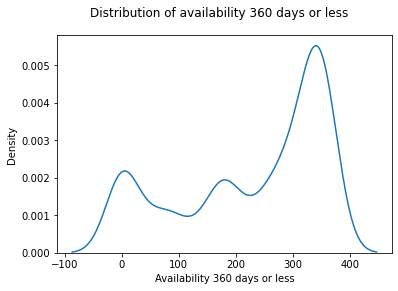

In [378]:
#5a. 360 days or less
avail360less_df = belize_airbnb_df.loc[belize_airbnb_df["availability_365"]<=360]
prob_avail360less = avail360less_df.shape[0]/belize_airbnb_df.shape[0]
print(prob_avail360less)

#distplot is getting deprecated, hence using kdeplot to display the distribution
sns.kdeplot(avail360less_df['availability_365'])
plt.suptitle("Distribution of availability 360 days or less")
plt.xlabel('Availability 360 days or less')
plt.show()

## 6. What minimum night count are 75% of Airbnb listing in Belize greater than?
    - The minimum night stay that is below 75% of all the other required minimum nights is 1 as shown by calculation,boxplot and  describe()




1.0
3.0


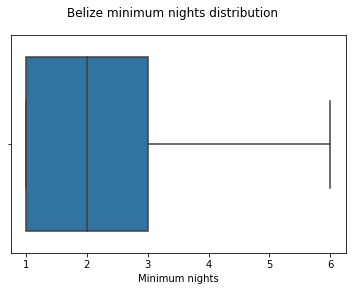

In [395]:
#6. 75% of minimum_night count are greater than 1

# first quartile 25%
q1 = np.quantile(belize_airbnb_df['minimum_nights'],0.25)
print(q1)

# Third quartile 75%
q3 = np.quantile(belize_airbnb_df['minimum_nights'],0.75)
print(q3)

#start of the box shows 1st quartile, i.e 25%, end of the box shows 3rd quartile i.e 75%
sns.boxplot(x='minimum_nights',data=belize_airbnb_df,showfliers=False)
plt.suptitle("Belize minimum nights distribution")
plt.xlabel('Minimum nights')
plt.show()

In [312]:
 belize_airbnb_df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64